<a href="https://colab.research.google.com/github/asifisa/customer_conversion_prediction/blob/main/CustomerConversionPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas-profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 88.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 53.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 31.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 69.3 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=2160ed270c738fb99ffa635b09b5c7a012fe6163e06b7

In [1]:
import pandas as pd
import numpy as np
import sklearn as sns
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

<ipython-input-1-343ff9714bad>:6: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [47]:
#Loading data using Pandas
data=pd.read_csv("train.csv")
data.head()

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,may,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,may,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,may,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,may,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,may,198,1,unknown,no


<AxesSubplot: title={'center': 'age'}, xlabel='y'>

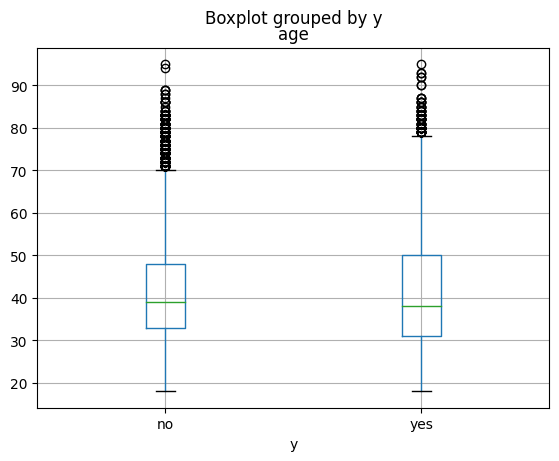

In [44]:
data.boxplot(column='age' , by='y')

In [48]:
#Data Preprocessing
data = data.drop(['call_type'],axis=1)


In [49]:
cols=data.columns
for i in cols:
  data[i]=data[i].replace('unknown',np.nan)

In [50]:
data.isnull().sum()

age                   0
job                 288
marital               0
education_qual     1857
day                   0
mon                   0
dur                   0
num_calls             0
prev_outcome      36959
y                     0
dtype: int64

In [52]:
data.job.unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar', nan,
       'retired', 'admin.', 'services', 'self-employed', 'unemployed',
       'housemaid', 'student'], dtype=object)

In [53]:
from sklearn.impute import SimpleImputer

In [54]:
imputer=SimpleImputer(strategy="most_frequent")

In [55]:
data = imputer.fit_transform(data)

In [56]:
data=pd.DataFrame(data, columns=cols)
data

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,5,may,261,1,failure,no
1,44,technician,single,secondary,5,may,151,1,failure,no
2,33,entrepreneur,married,secondary,5,may,76,1,failure,no
3,47,blue-collar,married,secondary,5,may,92,1,failure,no
4,33,blue-collar,single,secondary,5,may,198,1,failure,no
...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,17,nov,977,3,failure,yes
45207,71,retired,divorced,primary,17,nov,456,2,failure,yes
45208,72,retired,married,secondary,17,nov,1127,5,success,yes
45209,57,blue-collar,married,secondary,17,nov,508,4,failure,no


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             45211 non-null  object
 1   job             45211 non-null  object
 2   marital         45211 non-null  object
 3   education_qual  45211 non-null  object
 4   day             45211 non-null  object
 5   mon             45211 non-null  object
 6   dur             45211 non-null  object
 7   num_calls       45211 non-null  object
 8   prev_outcome    45211 non-null  object
 9   y               45211 non-null  object
dtypes: object(10)
memory usage: 3.4+ MB


In [58]:
data.describe()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,77,11,3,3,31,12,1573,48,3,2
top,32,blue-collar,married,secondary,20,may,124,1,failure,no
freq,2085,10020,27214,25059,2752,13766,188,17544,41860,39922


In [59]:
#performing pandas profiling before data preprocessing
profile = ProfileReport(data, title = 'Pandas Profiling before data preprocessing', minimal = True, progress_bar = False)
profile.to_notebook_iframe()

In [60]:
data.isnull().sum()

age               0
job               0
marital           0
education_qual    0
day               0
mon               0
dur               0
num_calls         0
prev_outcome      0
y                 0
dtype: int64

In [61]:
print(data.nunique())

age                 77
job                 11
marital              3
education_qual       3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         3
y                    2
dtype: int64


In [63]:
from sklearn.preprocessing import LabelEncoder
encoded_train=data.copy()
le=LabelEncoder()
cols_to_be_labelEncoded = ['marital','education_qual','prev_outcome','y']
for i in cols_to_be_labelEncoded:
  encoded_train[i] = le.fit_transform(encoded_train[i])

In [64]:
data_train=encoded_train
data_train.head()

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y
0,58,management,1,2,5,may,261,1,0,0
1,44,technician,2,1,5,may,151,1,0,0
2,33,entrepreneur,1,1,5,may,76,1,0,0
3,47,blue-collar,1,1,5,may,92,1,0,0
4,33,blue-collar,2,1,5,may,198,1,0,0


In [65]:
data_train.nunique()

age                 77
job                 11
marital              3
education_qual       3
day                 31
mon                 12
dur               1573
num_calls           48
prev_outcome         3
y                    2
dtype: int64

In [66]:
from sklearn.preprocessing import OneHotEncoder

In [67]:
job_ohe=OneHotEncoder()

In [68]:
encoded_job=job_ohe.fit_transform(encoded_train[['job']]).toarray()

In [69]:
job_features = job_ohe.categories_

In [70]:
job_features

[array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
        'retired', 'self-employed', 'services', 'student', 'technician',
        'unemployed'], dtype=object)]

In [71]:
mon_ohe=OneHotEncoder()

In [72]:
encoded_mon=mon_ohe.fit_transform(encoded_train[['mon']]).toarray()

In [73]:
mon_features = mon_ohe.categories_

In [74]:
mon_features

[array(['apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun', 'mar', 'may',
        'nov', 'oct', 'sep'], dtype=object)]

In [75]:
features = np.concatenate((job_features[0],mon_features[0]))

In [76]:
features

array(['admin.', 'blue-collar', 'entrepreneur', 'housemaid', 'management',
       'retired', 'self-employed', 'services', 'student', 'technician',
       'unemployed', 'apr', 'aug', 'dec', 'feb', 'jan', 'jul', 'jun',
       'mar', 'may', 'nov', 'oct', 'sep'], dtype=object)

In [77]:
print(features)

['admin.' 'blue-collar' 'entrepreneur' 'housemaid' 'management' 'retired'
 'self-employed' 'services' 'student' 'technician' 'unemployed' 'apr'
 'aug' 'dec' 'feb' 'jan' 'jul' 'jun' 'mar' 'may' 'nov' 'oct' 'sep']


In [78]:
feature_array = np.concatenate((encoded_job,encoded_mon),axis=1)

In [79]:
ohe_encoded = pd.DataFrame(feature_array, columns = features)

In [80]:
ohe_encoded.shape

(45211, 23)

In [81]:
data_train.shape

(45211, 10)

In [82]:
encoded_data = pd.concat((data_train, ohe_encoded),axis=1)

In [83]:
encoded_data

,age,job,marital,education_qual,day,mon,dur,num_calls,prev_outcome,y,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,management,1,2,5,may,261,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,technician,2,1,5,may,151,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,entrepreneur,1,1,5,may,76,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,47,blue-collar,1,1,5,may,92,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33,blue-collar,2,1,5,may,198,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,1,2,17,nov,977,3,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,71,retired,0,0,17,nov,456,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,72,retired,1,1,17,nov,1127,5,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45209,57,blue-collar,1,1,17,nov,508,4,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [84]:
encoded_data = encoded_data.drop(['job','mon'],axis=1)

In [85]:
encoded_data

,age,marital,education_qual,day,dur,num_calls,prev_outcome,y,admin.,blue-collar,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,58,1,2,5,261,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,44,2,1,5,151,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,33,1,1,5,76,1,0,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,47,1,1,5,92,1,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,33,2,1,5,198,1,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,1,2,17,977,3,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45207,71,0,0,17,456,2,0,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45208,72,1,1,17,1127,5,2,1,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
45209,57,1,1,17,508,4,0,0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [86]:
encoded_data.shape

(45211, 31)

In [87]:
#performing pandas profiling after data preprocessing
profile = ProfileReport(encoded_data, title = 'Pandas Profiling after data preprocessing', minimal = True, progress_bar = False)
profile.to_notebook_iframe()

<AxesSubplot: ylabel='y'>

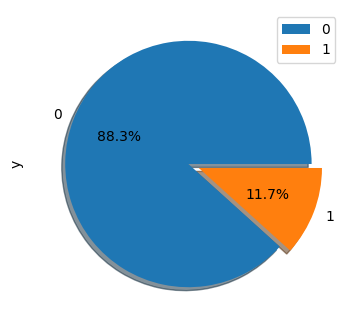

In [91]:
data_train['y'].value_counts().plot(kind='pie', legend = True, explode = [0,0.09], autopct = "%3.1f%%", shadow = True, figsize=(4,4))

In [92]:
encoded_data.corr()

<ipython-input-92-b6ab4400e024>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  encoded_data.corr()


,marital,education_qual,prev_outcome,y,admin.,blue-collar,entrepreneur,housemaid,management,retired,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
marital,1.000000,0.119220,0.030059,0.045588,0.012648,-0.032011,-0.038824,-0.055215,0.022322,-0.116171,...,0.006944,0.027979,0.028245,-0.036866,-0.024767,0.019574,0.020791,-0.027737,0.011255,0.018075
education_qual,0.119220,1.000000,0.049114,0.068633,-0.039928,-0.412379,0.055307,-0.131003,0.513420,-0.116929,...,0.011102,0.021671,0.020113,-0.019873,-0.058521,0.034503,-0.101028,0.056033,0.022672,0.023947
prev_outcome,0.030059,0.049114,1.000000,0.288952,0.016002,-0.047057,-0.023639,-0.016563,0.020200,0.047132,...,0.083846,0.059079,0.038604,-0.075854,-0.045578,0.057247,-0.049719,0.012989,0.105393,0.128087
y,0.045588,0.068633,0.288952,1.000000,0.005637,-0.071279,-0.019662,-0.015195,0.032919,0.079245,...,0.075164,0.038417,-0.008783,-0.034382,-0.016805,0.129456,-0.102500,-0.014937,0.128531,0.123185
admin.,0.012648,-0.039928,0.016002,0.005637,1.000000,-0.191760,-0.066273,-0.060349,-0.184835,-0.082511,...,-0.001495,0.003261,0.007026,0.015926,-0.004495,0.013225,0.026657,-0.007874,0.011293,0.007279
blue-collar,-0.032011,-0.412379,-0.047057,-0.071279,-0.191760,1.000000,-0.098404,-0.089608,-0.274449,-0.122515,...,-0.026712,-0.038794,-0.034071,-0.014979,0.030736,-0.041028,0.157159,-0.049649,-0.039320,-0.041831
entrepreneur,-0.038824,0.055307,-0.023639,-0.019662,-0.066273,-0.098404,1.000000,-0.030969,-0.094850,-0.042342,...,-0.007297,-0.000067,-0.005825,0.025949,0.015497,-0.016615,-0.009908,0.051017,-0.012012,-0.007769
housemaid,-0.055215,-0.131003,-0.016563,-0.015195,-0.060349,-0.089608,-0.030969,1.000000,-0.086372,-0.038557,...,0.000258,-0.012486,-0.005061,0.034992,0.052663,-0.000110,-0.066673,-0.013343,0.006155,-0.002265
management,0.022322,0.513420,0.020200,0.032919,-0.184835,-0.274449,-0.094850,-0.086372,1.000000,-0.118091,...,0.004938,0.000194,-0.001099,-0.013827,-0.032403,0.023532,-0.084114,0.051012,0.009704,0.023154
retired,-0.116171,-0.116929,0.047132,0.079245,-0.082511,-0.122515,-0.042342,-0.038557,-0.118091,1.000000,...,0.044745,0.015263,0.010962,-0.001770,0.011167,0.041801,-0.073902,-0.022146,0.077666,0.061337


In [93]:
y=encoded_data['y']
y.shape

(45211,)

In [94]:
X=encoded_data.drop('y', axis=1)
X.shape

(45211, 30)

In [95]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [96]:
X_train.shape

(36168, 30)

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report


In [99]:
log_model = LogisticRegression(max_iter=1000)
scores = cross_val_score(estimator=log_model, X=X_train,y=y_train,cv=5,scoring='roc_auc')
print(scores)
print("Mean",scores.mean())

[0.88851455 0.89194742 0.8930575  0.8909679  0.90141519]
Mean 0.8931805137543856


In [100]:
decision_tree = DecisionTreeClassifier(max_depth=9, random_state=123, splitter="best", criterion="gini")
scores = cross_val_score(estimator=decision_tree, X=X_train,y=y_train,cv=5,scoring='roc_auc')
print(scores)
print("Mean",scores.mean())

[0.83494614 0.83430869 0.8432676  0.83531863 0.85547393]
Mean 0.8406629965246184


In [101]:
model_rf=RandomForestClassifier()

In [103]:
log_model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [105]:
log_model.score(X_test,y_test)

0.8976003538648678

In [106]:
log_model.score(X_train,y_train)

0.900519796505198

In [122]:
y_pred = log_model.predict(X_test)

In [108]:
y_test

14001    0
32046    1
13318    0
42991    0
14237    0
        ..
18448    1
6654     0
17106    0
9025     1
13171    0
Name: y, Length: 9043, dtype: int64

In [120]:
from sklearn.metrics import classification_report

In [124]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.33      0.43      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [139]:
log_model.predict_proba(X_test)

array([[0.99043313, 0.00956687],
       [0.22789861, 0.77210139],
       [0.97803897, 0.02196103],
       ...,
       [0.9811036 , 0.0188964 ],
       [0.42192428, 0.57807572],
       [0.96820755, 0.03179245]])

In [127]:
model_rf = RandomForestClassifier(n_estimators=100, oob_score=True, n_jobs=-1, random_state=50, max_features="auto", max_leaf_nodes=30)
scores = cross_val_score(estimator=model_rf, X=X_train,y=y_train,cv=5,scoring='roc_auc')
print(scores)
print("Mean",scores.mean())

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForest

[0.90196148 0.90634643 0.90718774 0.90277462 0.91674506]
Mean 0.9070030654266523


In [128]:
model_rf.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', max_leaf_nodes=30, n_jobs=-1,
                       oob_score=True, random_state=50)

In [129]:
for score, name in sorted(zip(model_rf.feature_importances_, X_train.columns), reverse = True):
  print('Feature importance of', name,':',score*100, '%')

Feature importance of dur : 46.50750845604513 %
Feature importance of prev_outcome : 24.939015932417476 %
Feature importance of age : 5.84722759113743 %
Feature importance of mar : 4.920650689195941 %
Feature importance of oct : 4.24917233849883 %
Feature importance of sep : 3.0244361040256846 %
Feature importance of may : 2.0280216056259777 %
Feature importance of day : 1.7986938590037127 %
Feature importance of dec : 0.8988900179758079 %
Feature importance of num_calls : 0.8961001588704698 %
Feature importance of student : 0.8223483638861582 %
Feature importance of apr : 0.7129627697184822 %
Feature importance of marital : 0.6374247004037787 %
Feature importance of education_qual : 0.41156964996828815 %
Feature importance of blue-collar : 0.39578801298483685 %
Feature importance of retired : 0.35127436895933467 %
Feature importance of nov : 0.31050748060524974 %
Feature importance of feb : 0.2635197319025223 %
Feature importance of jul : 0.25238647670673203 %
Feature importance of au

In [130]:
model_rf.feature_importances_*100

array([5.84722759e+00, 6.37424700e-01, 4.11569650e-01, 1.79869386e+00,
       4.65075085e+01, 8.96100159e-01, 2.49390159e+01, 1.47301771e-02,
       3.95788013e-01, 5.58941075e-02, 1.23363227e-02, 7.23527296e-02,
       3.51274369e-01, 2.84474989e-02, 4.16716039e-02, 8.22348364e-01,
       6.97987354e-02, 3.86484058e-02, 7.12962770e-01, 1.97143478e-01,
       8.98890018e-01, 2.63519732e-01, 1.58446706e-01, 2.52386477e-01,
       4.30319274e-02, 4.92065069e+00, 2.02802161e+00, 3.10507481e-01,
       4.24917234e+00, 3.02443610e+00])

In [131]:
param_grid = [{'n_estimators': [100,200,300],
               'max_depth': [None,2,3,10,20],
               'max_features': ['auto',2,4,6,8,16,'log2',None]}]

In [141]:
temp_rf = RandomForestClassifier(random_state=0,n_jobs=-1)

In [142]:
grid_search = GridSearchCV(estimator=temp_rf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1)

In [144]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
             n_jobs=-1,
             param_grid=[{'max_depth': [None, 2, 3, 10, 20],
                          'max_features': ['auto', 2, 4, 6, 8, 16, 'log2',
                                           None],
                          'n_estimators': [100, 200, 300]}],
             scoring='roc_auc')

In [145]:
grid_search.best_score_

0.9197736321353279

In [146]:
grid_search.best_params_

{'max_depth': 20, 'max_features': 'auto', 'n_estimators': 300}

In [147]:
final_rf = grid_search.best_estimator_

In [148]:
final_rf.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=20, max_features='auto', n_estimators=300,
                       n_jobs=-1, random_state=0)

In [149]:
y_train_pred = final_rf.predict(X_train)

In [150]:
y_test_pred = final_rf.predict(X_test)

In [ ]:
import pickle

In [ ]:
pickle.dump(final_rf, open("randomforest.pkl","wb"))

In [151]:
confusion_mat = pd.DataFrame(confusion_matrix(y_test,y_test_pred))

In [152]:
confusion_mat.index=['Actual Negative','Actual Positive']
confusion_mat.columns=['Predicted Negative','Predicted Positive']
confusion_mat

,Predicted Negative,Predicted Positive
Actual Negative,7732,248
Actual Positive,653,410


In [135]:
y_test_pred = model_rf.predict(X_test)

In [153]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7980
           1       0.62      0.39      0.48      1063

    accuracy                           0.90      9043
   macro avg       0.77      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043



TypeError: ignored